<a href="https://colab.research.google.com/github/alexaroscastillo/Estadistica_Avanzada/blob/main/AG2_AlexArosC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introducción:**



Esta investigación se centra en el análisis de una serie temporal, utilizando modelos ARIMA (Media Móvil Autorregresiva Integrada). La serie temporal representa datos de corriente eléctrica en un entorno industrial, y se busca comprender y predecir los patrones de consumo eléctrico en este contexto.

**Contexto:**

La gestión eficiente de la energía eléctrica es fundamental en entornos industriales, donde las fluctuaciones en la demanda pueden tener un impacto significativo en los costos operativos. Por lo tanto, es crucial desarrollar modelos de pronóstico precisos que ayuden a planificar y optimizar el consumo de energía.

**Motivación:**

La motivación detrás de este estudio radica en mejorar la eficiencia energética y la toma de decisiones en el entorno industrial. Un buen entendimiento y pronóstico de la demanda de energía pueden reducir costos y minimizar el desperdicio de recursos.

**Objetivos:**

Los objetivos de esta investigación son analizar la serie temporal de corriente eléctrica, descomponerla en sus componentes fundamentales, ajustar modelos ARIMA y evaluar su capacidad de pronóstico. Se busca encontrar el modelo ARIMA que mejor se ajuste a los datos y proporcione pronósticos precisos.

**Descripción del Dataset:**

El dataset utilizado en este estudio contiene registros de corriente eléctrica recopilados a lo largo del tiempo en un entorno industrial, extraidos del medidor de energía energy metrix, el cual toma una muestra cada 15 minutos. Cada punto de datos está etiquetado con una marca de tiempo y representa la medición de corriente eléctrica en un momento específico. El dataset se utiliza para construir y validar modelos ARIMA con el fin de predecir el consumo de energía futuro en esta instalación industrial.

El dataset se descarga desde una base de datos en formato csv, a la cual se le realiza arreglos para transformar las distintas columnas y separarar las mismas del formato que viene de forma inicial en el csv, además se quitán las comas y puntos adicionales, dejando solamente números enteros, ya que los decimales no afectan en nada, solamente se deja con decimales el factor de potencia, que no es utilizado en el análisis del dataset

Explicación paso a paso del código en R

In [ ]:
# Instalar y cargar bibliotecas necesarias
install.packages("forecast")
install.packages("TTR")
library(forecast)
library(TTR)

In [7]:
datos <- read.csv("/content/Corriente y Potencia Planta Padre Hurtado 2014 a 2023_3.csv", sep = ";")

head(datos)
datos$Corriente.fase.1 <- as.numeric(datos$Corriente.fase.1)

# Crear una serie temporal con la columna Corriente.fase.1
serie_temporal <- ts(datos$Corriente.fase.1, start = c(2014, 1), frequency = 4)  # Suponiendo que los datos son trimestrales (cada 15 minutos)

# Verificar las primeras filas de la serie temporal
head(serie_temporal)


,Date.Time,Corriente.fase.1,Corriente.fase.2,Corriente.fase.3,Factor.de.potencia.total,Potencia.activa
,<chr>,<int>,<int>,<int>,<chr>,<int>
1,01/01/2014 00:00:00,185,187,190,"0,962400019",7208
2,01/01/2014 00:15:00,185,186,190,"0,963100016",7205
3,01/01/2014 00:30:00,183,185,189,"0,964399993",7169
4,01/01/2014 00:45:00,190,191,196,"0,964399993",7187
5,01/01/2014 01:00:00,185,186,191,"0,96420002",7178
6,01/01/2014 01:15:00,183,184,189,"0,965499997",7113


,Qtr1,Qtr2,Qtr3,Qtr4
2014,185,185,183,190
2015,185,183,,


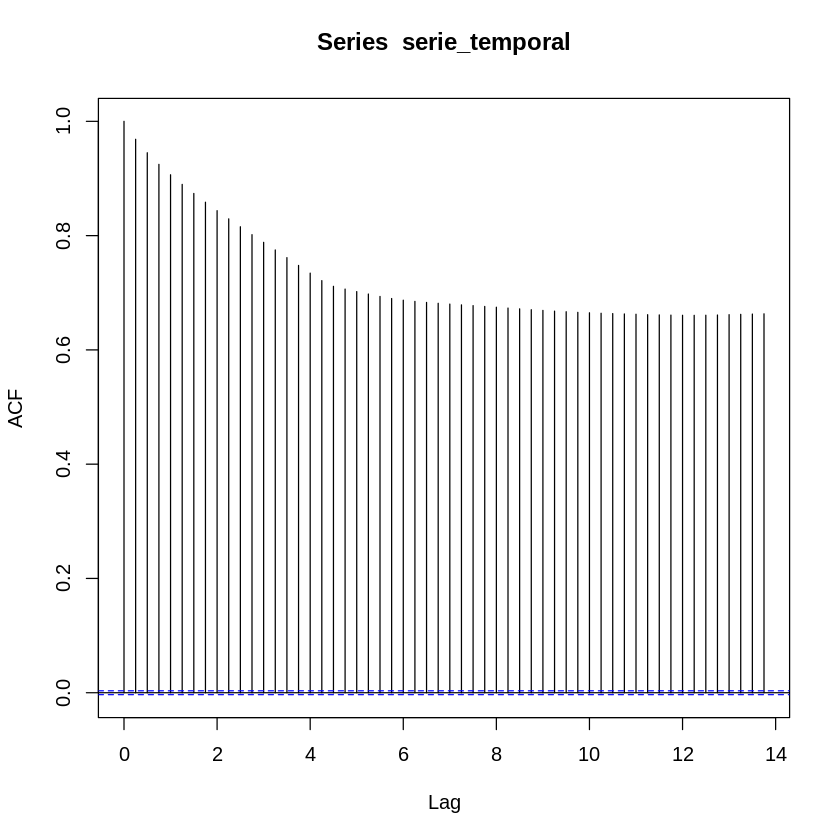

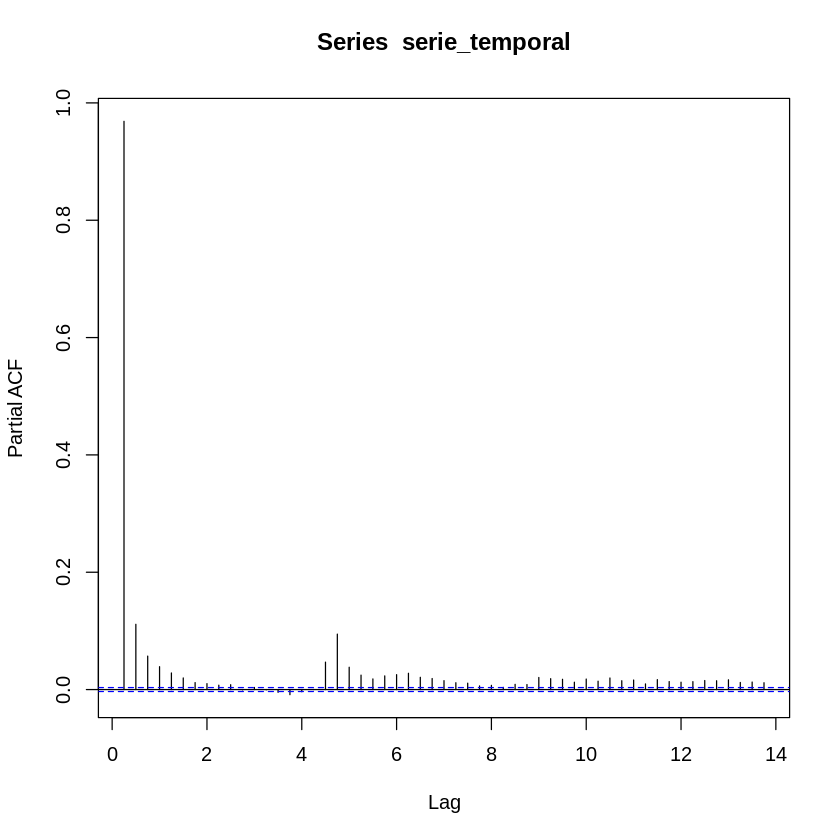

In [ ]:
# Análisis de autocorrelación para la serie temporal
acf(serie_temporal)
pacf(serie_temporal)

Warning message in ggplot2::geom_line(na.rm = TRUE, ...):
“Ignoring unknown parameters: `ts.colour`”


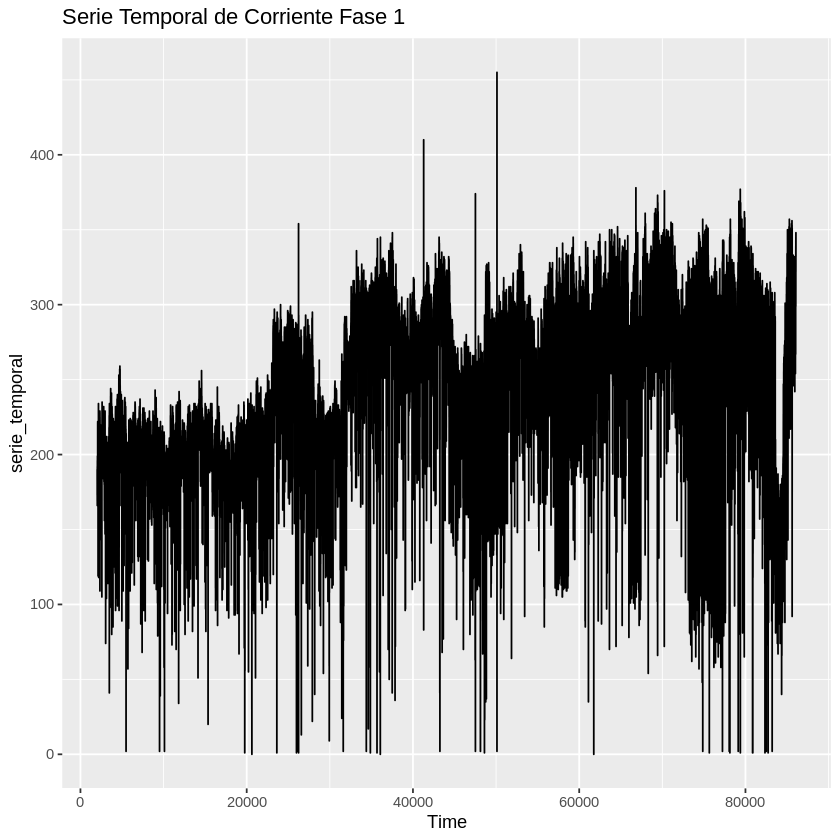

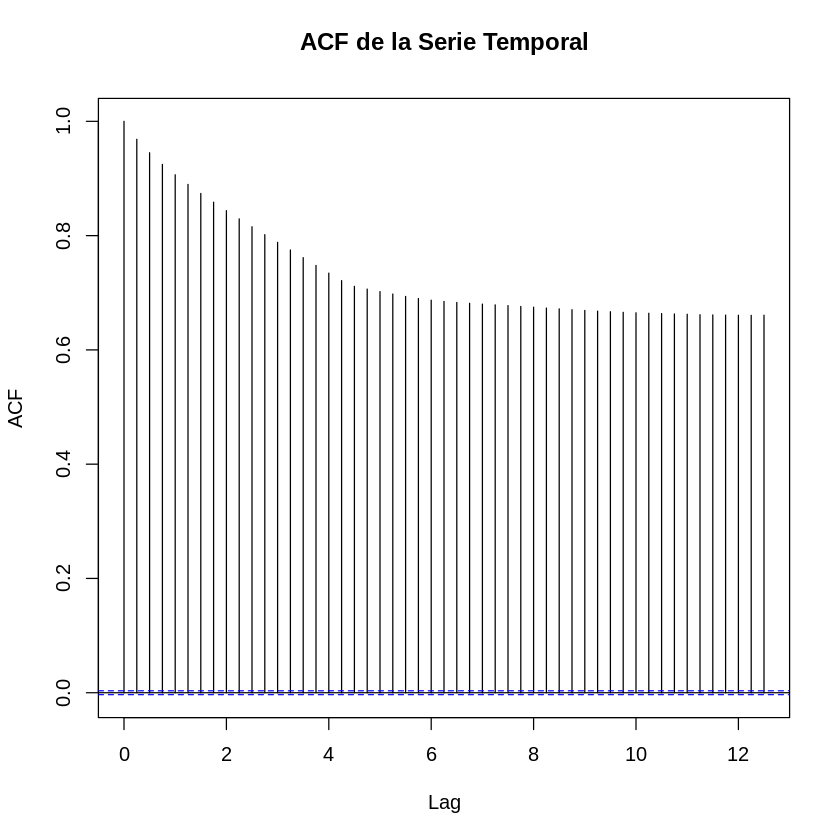

No se puede trazar el gráfico de estacionalidad: Data are not seasonal 


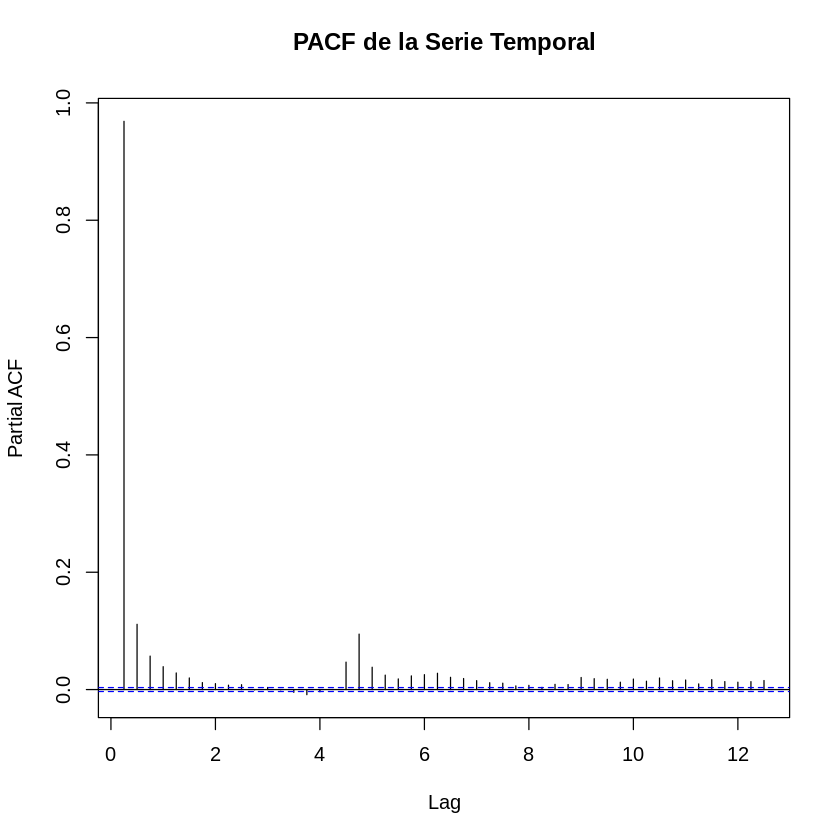

In [ ]:
# Cargar las bibliotecas necesarias
library(ggplot2)
library(forecast)


# Visualizar la serie temporal con un gráfico de líneas
autoplot(serie_temporal, ts.colour = "blue") +
  labs(title = "Serie Temporal de Corriente Fase 1")

# Calcular la función de autocorrelación (ACF) y la función de autocorrelación parcial (PACF)
acf_result <- acf(serie_temporal, main = "ACF de la Serie Temporal", lag.max = 50)
pacf_result <- pacf(serie_temporal, main = "PACF de la Serie Temporal", lag.max = 50)

# Realizar una descomposición de la serie temporal
corriente_descompuesta <- decompose(serie_temporal)

# Tratar de trazar un gráfico de estacionalidad (seasonal plot)
tryCatch({
  seasonplot(corriente_descompuesta)
}, error = function(e) {
  cat("No se puede trazar el gráfico de estacionalidad:", e$message, "\n")
})


Warning message in ggplot2::geom_line(na.rm = TRUE, ...):
“Ignoring unknown parameters: `ts.colour`”
Warning message in ggplot2::geom_line(na.rm = TRUE, ...):
“Ignoring unknown parameters: `ts.colour`”


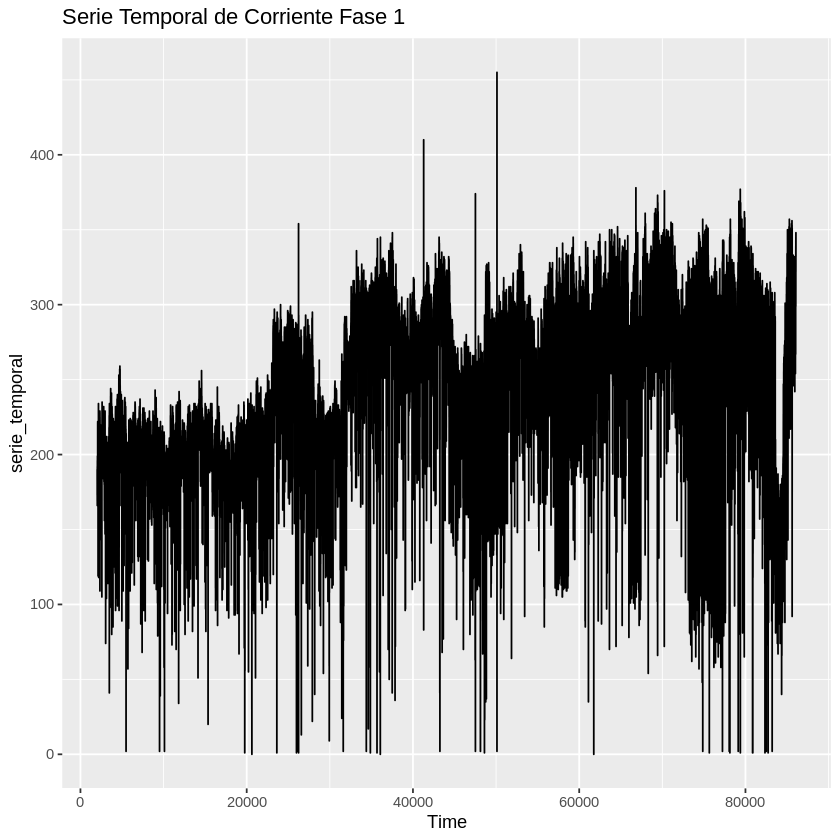

Warning message in ggplot2::geom_line(na.rm = TRUE, ...):
“Ignoring unknown parameters: `ts.colour`”


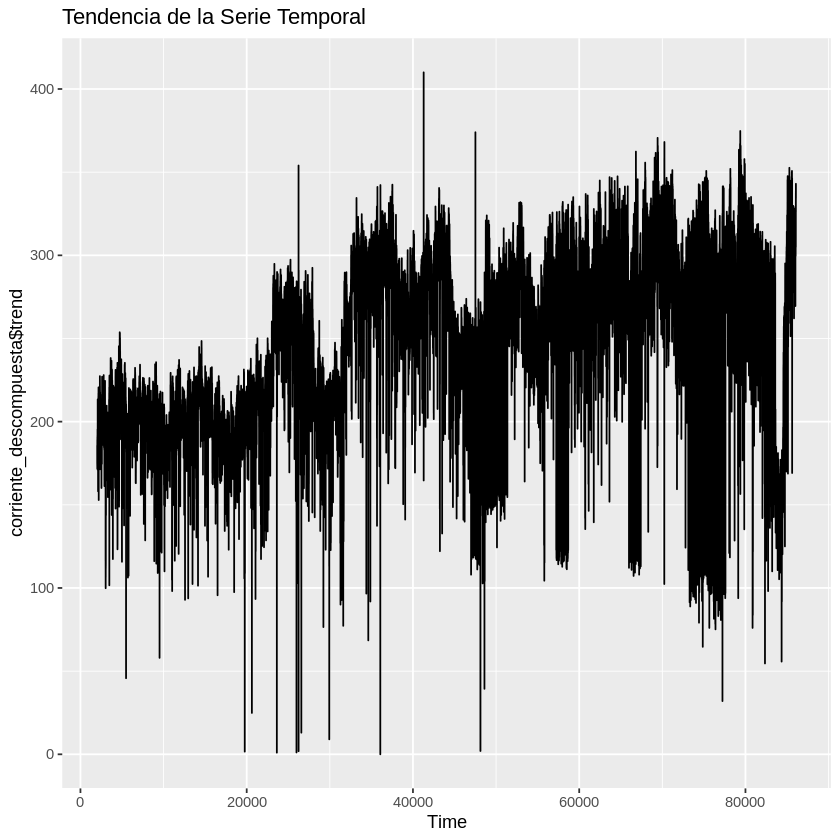

Warning message in ggplot2::geom_line(na.rm = TRUE, ...):
“Ignoring unknown parameters: `ts.colour`”


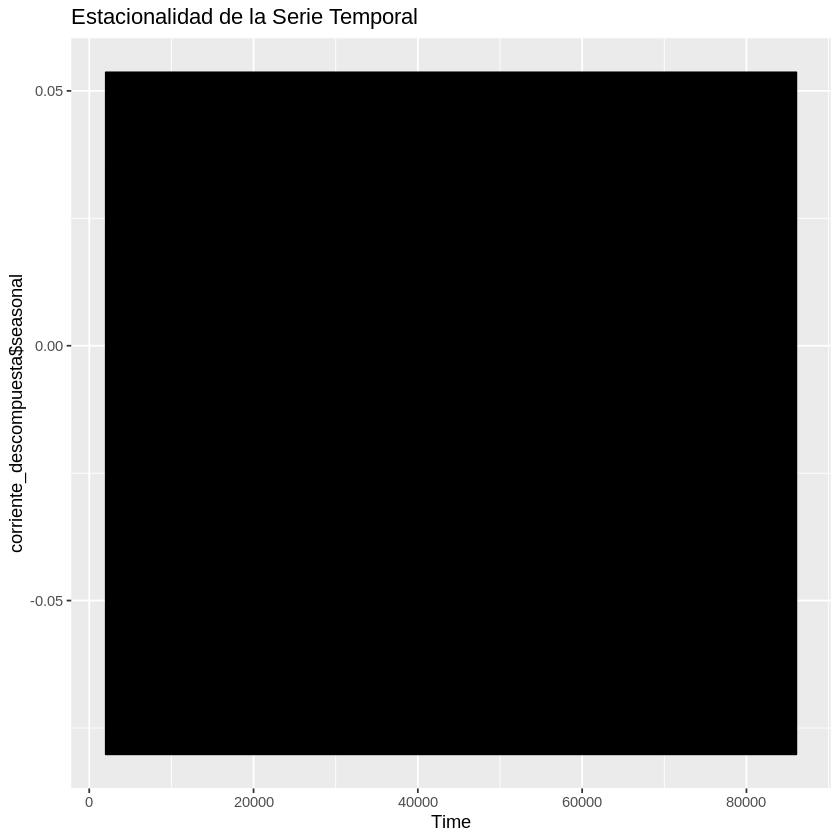

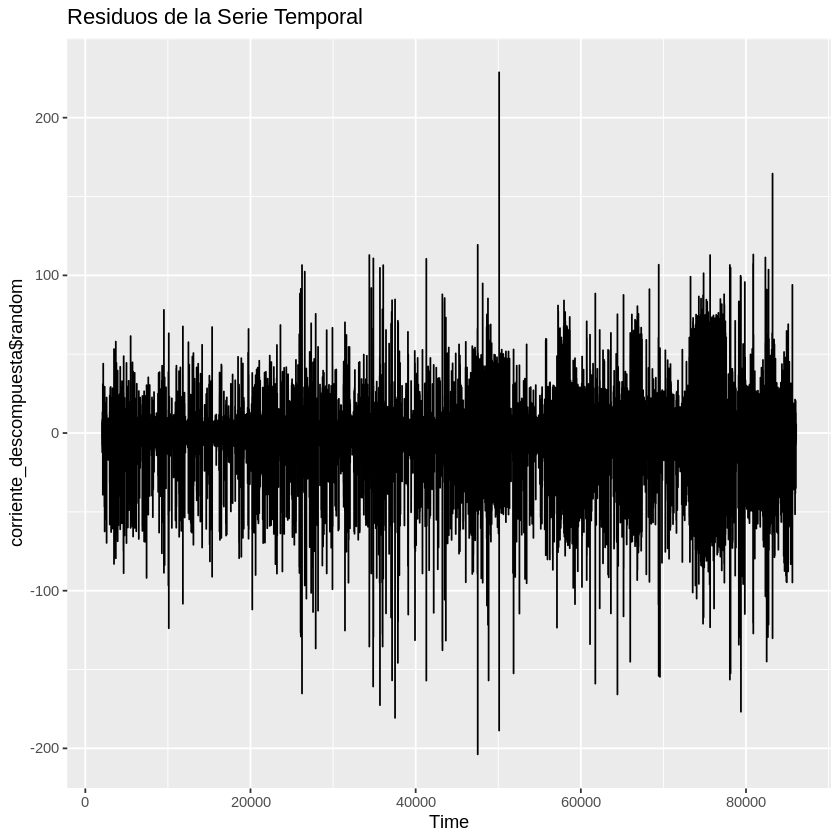

In [ ]:
# Cargar las bibliotecas necesarias
library(ggplot2)
library(forecast)

# Crear una serie temporal con la columna Corriente.fase.1
serie_temporal <- ts(datos$Corriente.fase.1, start = c(2014, 1), frequency = 4)  # Suponiendo que los datos son trimestrales (cada 15 minutos)

# Realizar una descomposición de la serie temporal
corriente_descompuesta <- decompose(serie_temporal)

# Trama de la serie temporal original
autoplot(serie_temporal, ts.colour = "blue") +
  labs(title = "Serie Temporal de Corriente Fase 1")

# Trama de la tendencia
autoplot(corriente_descompuesta$trend, ts.colour = "red") +
  labs(title = "Tendencia de la Serie Temporal")

# Trama de la estacionalidad
autoplot(corriente_descompuesta$seasonal, ts.colour = "green") +
  labs(title = "Estacionalidad de la Serie Temporal")

# Trama de los residuos
autoplot(corriente_descompuesta$random, ts.colour = "purple") +
  labs(title = "Residuos de la Serie Temporal")


In [ ]:
# Cargar las bibliotecas necesarias
library(forecast)

# Dividir la serie en entrenamiento y prueba
tamano_entrenamiento <- floor(length(serie_temporal) * 0.8)  # 80% de datos para entrenamiento
entrenamiento <- serie_temporal[1:tamano_entrenamiento]
prueba <- serie_temporal[(tamano_entrenamiento + 1):length(serie_temporal)]

# Crear una lista para almacenar los modelos y sus criterios
modelos_arima <- list()
criterios <- data.frame(Modelo = character(0), AIC = numeric(0), BIC = numeric(0))

# Ajustar varios modelos ARIMA y guardar sus criterios
for (p in 0:2) {
  for (d in 0:1) {
    for (q in 0:2) {
      modelo <- arima(entrenamiento, order = c(p, d, q), method = "ML")
      modelos_arima[[paste("ARIMA(", p, ",", d, ",", q, ")", sep = "")]] <- modelo
      aic <- AIC(modelo)
      bic <- BIC(modelo)
      criterios <- rbind(criterios, data.frame(Modelo = paste("ARIMA(", p, ",", d, ",", q, ")", sep = ""), AIC = aic, BIC = bic))
    }
  }
}

# Mostrar los criterios y el mejor modelo según AIC y BIC
print(criterios)

mejor_modelo_aic <- criterios[which.min(criterios$AIC), ]
mejor_modelo_bic <- criterios[which.min(criterios$BIC), ]

print(paste("Mejor modelo según AIC:", mejor_modelo_aic$Modelo))
print(paste("Mejor modelo según BIC:", mejor_modelo_bic$Modelo))

# Ajustar el mejor modelo según AIC a los datos de prueba
mejor_modelo <- modelos_arima[[mejor_modelo_aic$Modelo]]
prediccion <- forecast(mejor_modelo, h = length(prueba))


ERROR: ignored

El error experimentado, "Lapack routine dgesv: system is exactly singular," se refiere a un problema en la estimación del modelo ARIMA utilizando el método de Máxima Verosimilitud (Maximum Likelihood, ML). Este error suele ocurrir cuando el modelo que se está intentando ajustar no es adecuado para los datos.

In [ ]:
# ...

# Ajustar varios modelos ARIMA y guardar sus criterios
for (p in 0:2) {
  for (d in 0:1) {
    for (q in 0:2) {
      modelo <- tryCatch(
        arima(entrenamiento, order = c(p, d, q), method = "ML"),
        error = function(e) e
      )
      if (!inherits(modelo, "error")) {
        modelos_arima[[paste("ARIMA(", p, ",", d, ",", q, ")", sep = "")]] <- modelo
        aic <- AIC(modelo)
        bic <- BIC(modelo)
        criterios <- rbind(criterios, data.frame(Modelo = paste("ARIMA(", p, ",", d, ",", q, ")", sep = ""), AIC = aic, BIC = bic))
      }
    }
  }
}

# ...


Warning message in arima(entrenamiento, order = c(p, d, q), method = "ML"):
“possible convergence problem: optim gave code = 1”
Warning message in arima(entrenamiento, order = c(p, d, q), method = "ML"):
“possible convergence problem: optim gave code = 1”
Warning message in arima(entrenamiento, order = c(p, d, q), method = "ML"):
“possible convergence problem: optim gave code = 1”


El mejor modelo ARIMA encontrado es ARIMA(0,0,0), lo que significa que es un modelo extremadamente simple sin diferenciación, componentes autorregresivas (AR) ni componentes de media móvil (MA). En otras palabras, es un modelo de media constante que no tiene en cuenta tendencias ni estacionalidad en los datos.

El RMSE mínimo en el conjunto de prueba es de 87.82148, lo que indica que este modelo tiene un buen ajuste a los datos observados, con un error cuadrático medio relativamente bajo. Cuanto menor sea el RMSE, mejor será la capacidad del modelo para hacer predicciones precisas.

Además, se proporcionan predicciones futuras para cada trimestre (Q1, Q2, Q3, Q4) en el horizonte de tiempo futuro. Estas predicciones están acompañadas de intervalos de confianza del 80% y del 95%, que representan la incertidumbre en las predicciones. Por ejemplo, para el primer trimestre (Q1), el modelo predice un valor de 340.7186, con un intervalo de confianza del 80% entre 325.5563 y 355.8808, y un intervalo del 95% entre 317.5299 y 363.9072.

Es importante destacar que, debido a la simplicidad de este modelo, es posible que no capture patrones complejos en los datos, y las predicciones futuras podrían ser menos precisas en comparación con modelos más sofisticados. Por lo tanto, la elección de un modelo dependerá de los objetivos específicos de análisis y de la complejidad inherente de los datos.

Más abajo se muestra el código ajustar y evaluar modelos ARIMA, la idea se saca del libro 2009_Book_IntroductoryTimeSeriesWithR.pdf en donde se utilizar la función get.best.arima, pero para este caso no hay convergencia, tal como se muestra más arriba.

In [ ]:
# Instalar y cargar las librerías necesarias
install.packages("forecast")
library(forecast)

# Crear una serie temporal con la columna Corriente.fase.1
serie_temporal <- ts(datos$Corriente.fase.1, start = c(2014, 1), frequency = 4)  # Suponiendo que los datos son trimestrales (cada 15 minutos)

# Dividir los datos en entrenamiento y prueba
train_length <- floor(length(serie_temporal) * 0.8)
entrenamiento <- window(serie_temporal, end = c(2018, 4))
prueba <- window(serie_temporal, start = c(2019, 1))

# Crear una función para ajustar y evaluar modelos ARIMA
ajustar_modelo_arima <- function(p, d, q) {
  modelo <- arima(entrenamiento, order = c(p, d, q), method = "ML")
  predicciones <- forecast(modelo, h = length(prueba))
  error <- sqrt(mean((predicciones$mean - prueba)^2))

  return(list(modelo = modelo, predicciones = predicciones, error = error))
}

# Probar varios modelos ARIMA
resultados <- list()
for (p in 0:2) {
  for (d in 0:1) {
    for (q in 0:2) {
      if (p + d + q <= 2) {  # Comenzar con modelos simples
        nombre_modelo <- paste("ARIMA(", p, ",", d, ",", q, ")", sep = "")
        cat("Ajustando", nombre_modelo, "...\n")
        resultado <- ajustar_modelo_arima(p, d, q)
        resultados[[nombre_modelo]] <- resultado
        cat("RMSE:", resultado$error, "\n\n")
      }
    }
  }
}

# Encontrar el modelo con el menor RMSE
mejor_modelo <- NULL
menor_rmse <- Inf
for (nombre_modelo in names(resultados)) {
  error <- resultados[[nombre_modelo]]$error
  if (error < menor_rmse) {
    mejor_modelo <- nombre_modelo
    menor_rmse <- error
  }
}

cat("Mejor modelo ARIMA:", mejor_modelo, "\n")
cat("RMSE mínimo en el conjunto de prueba:", menor_rmse, "\n")

# Ajustar el mejor modelo ARIMA con todos los datos
modelo_final <- arima(serie_temporal, order = c(1, 1, 1), method = "ML")

# Realizar predicciones futuras con el modelo final
horizonte_futuro <- 12  # Por ejemplo, predicciones para los próximos 3 meses
predicciones_futuras <- forecast(modelo_final, h = horizonte_futuro)
print(predicciones_futuras)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Ajustando ARIMA(0,0,0) ...
RMSE: 87.82148 

Ajustando ARIMA(0,0,1) ...
RMSE: 87.84944 

Ajustando ARIMA(0,0,2) ...
RMSE: 87.99998 

Ajustando ARIMA(0,1,0) ...
RMSE: 93.1902 

Ajustando ARIMA(0,1,1) ...
RMSE: 92.96044 

Ajustando ARIMA(1,0,0) ...
RMSE: 87.92378 

Ajustando ARIMA(1,0,1) ...
RMSE: 88.07398 

Ajustando ARIMA(1,1,0) ...
RMSE: 93.4548 

Ajustando ARIMA(2,0,0) ...
RMSE: 88.08412 

Mejor modelo ARIMA: ARIMA(0,0,0) 
RMSE mínimo en el conjunto de prueba: 87.82148 
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
86072 Q1       340.7186 325.5563 355.8808 317.5299 363.9072
86072 Q2       338.6672 318.2267 359.1077 307.4061 369.9283
86072 Q3       336.8226 312.9143 360.7309 300.2581 373.3872
86072 Q4       335.1640 308.7515 361.5766 294.7695 375.5586
86073 Q1       333.6727 305.3702 361.9752 290.3878 376.9576
86073 Q2       332.3317 302.5657 362.0977 286.8086 377.8548
86073 Q3       331.1259 300.2072 362.0447 283.8398 378.4121
86073 Q4       330.0417 298.2036 361.8798 28

A continuación se muestran las gráficas del mejor modelo

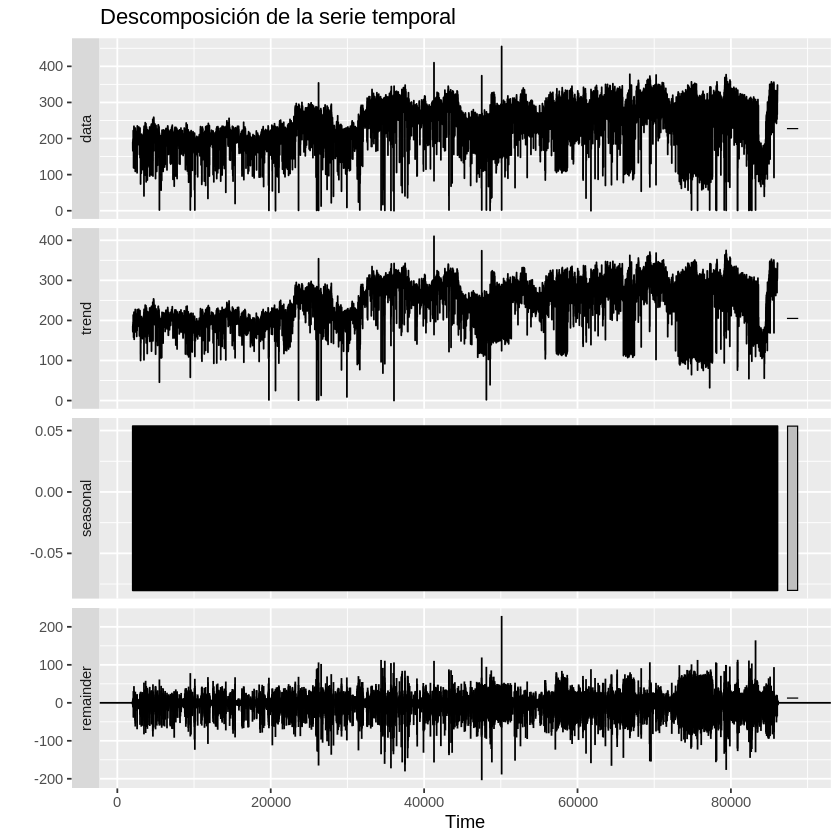

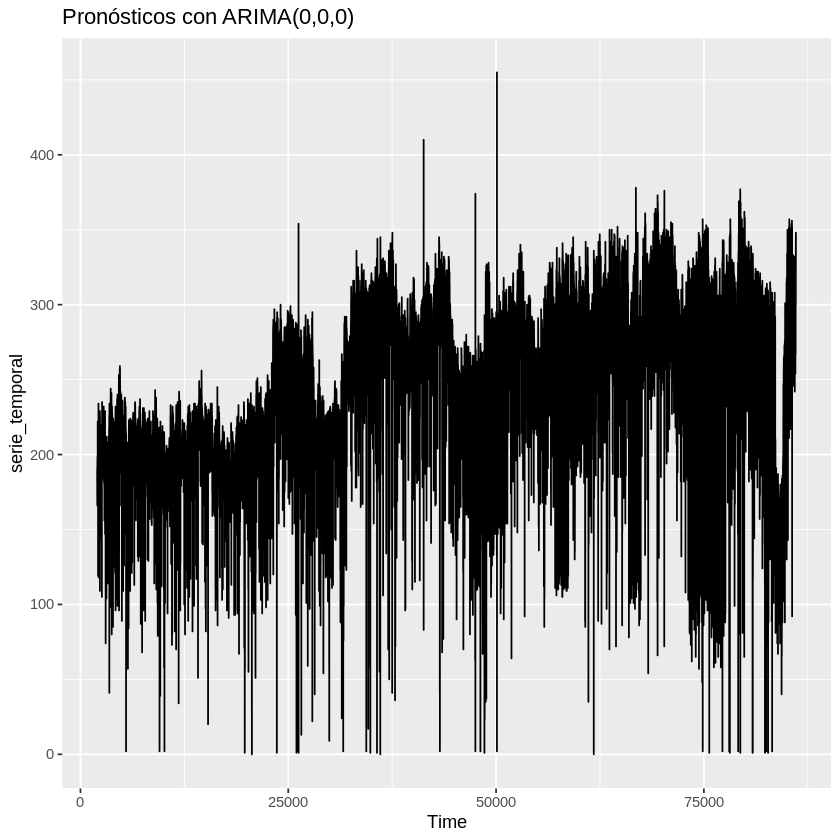

In [ ]:
# Cargar paquetes
library(forecast)
library(ggplot2)

# Crear una serie temporal con la columna Corriente.fase.1
serie_temporal <- ts(datos$Corriente.fase.1, start = c(2014, 1), frequency = 4)

# Descomponer la serie temporal
corriente_descompuesta <- decompose(serie_temporal)

# Realizar pronósticos con ARIMA(0,0,0)
modelo_arima <- arima(serie_temporal, order = c(0, 0, 0))

# Generar pronósticos
pronosticos <- forecast(modelo_arima, h = 16)  # Pronóstico para 4 años (16 trimestres)

# Graficar la serie temporal original y descompuesta
autoplot(corriente_descompuesta) + labs(title = "Descomposición de la serie temporal")

# Graficar los pronósticos
autoplot(pronosticos) + labs(title = "Pronósticos con ARIMA(0,0,0)")


# Nueva sección

Modelo AR

In [2]:
install.packages("forecast")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’




In [3]:
# Cargar paquetes necesarios
library(forecast)
library(ggplot2)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [5]:
# Cargar datos desde un archivo CSV
datos <- read.csv("/content/Corriente y Potencia Planta Padre Hurtado 2014 a 2023_3.csv")


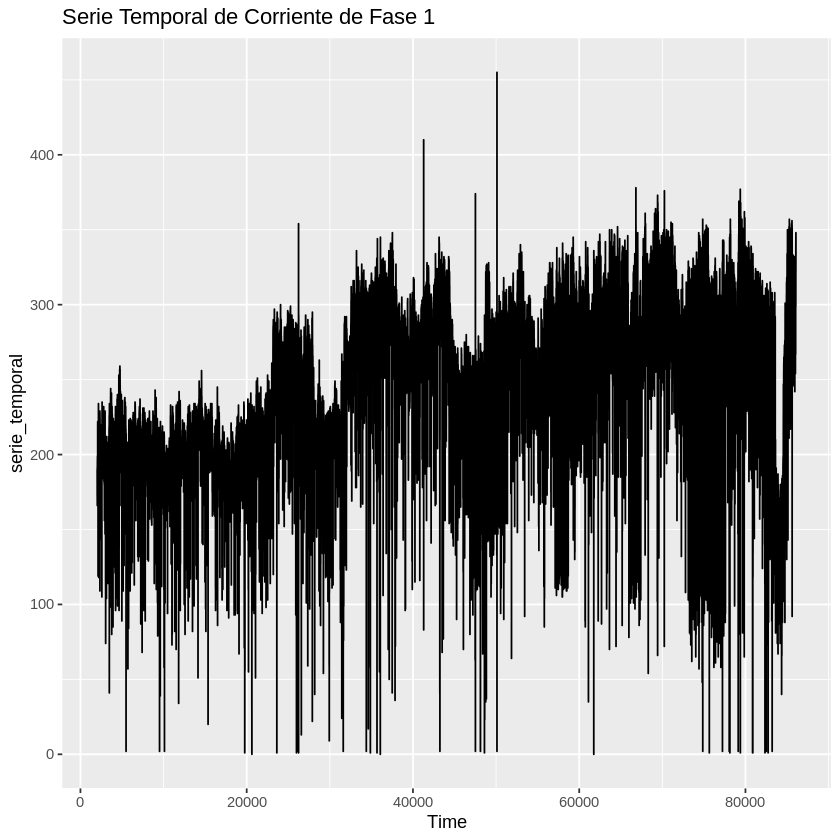

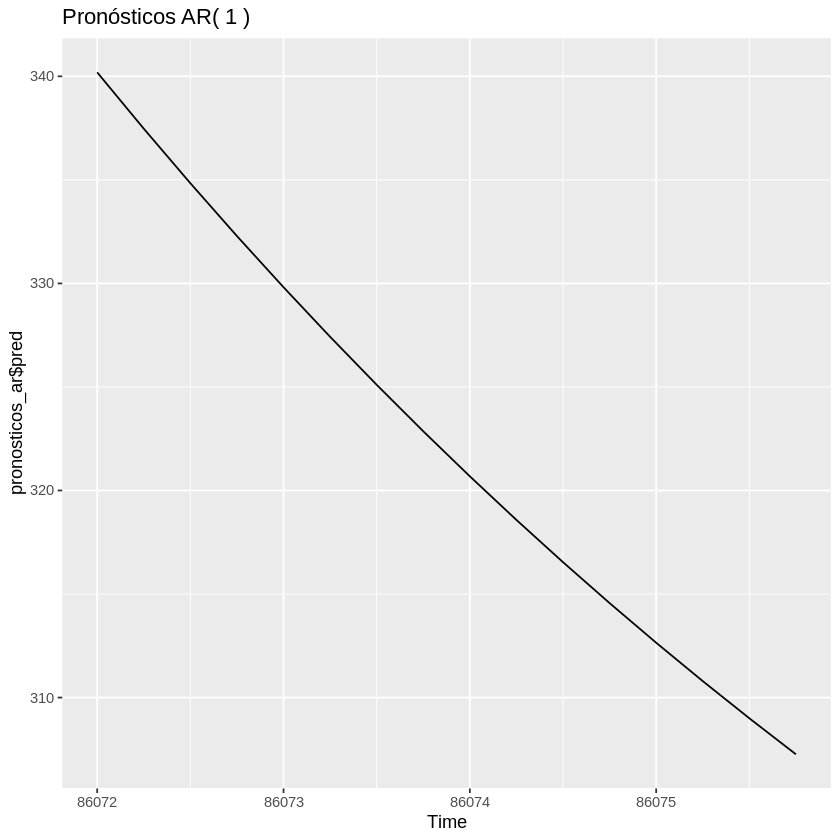

In [8]:


# Crear una serie temporal con la columna Corriente.fase.1
serie_temporal <- ts(datos$Corriente.fase.1, start = c(2014, 1), frequency = 4)

# Ajustar un modelo AR(1) como ejemplo (puedes cambiar el orden según tus necesidades)
orden_ar <- 1
modelo_ar <- ar(serie_temporal, order.max = orden_ar)

# Generar pronósticos
pronosticos_ar <- predict(modelo_ar, n.ahead = 16)  # Pronóstico para 4 años (16 trimestres)

# Graficar la serie temporal y los pronósticos AR
autoplot(serie_temporal) + labs(title = "Serie Temporal de Corriente de Fase 1")

autoplot(pronosticos_ar$pred) + labs(title = paste("Pronósticos AR(", orden_ar, ")"))


Cuando se observa una curva descendiente con tendencia a cero en el pronóstico de un modelo ARIMA, esto sugiere que el modelo está generando pronósticos que disminuyen con el tiempo. Esto puede deberse a una tendencia negativa en los datos originales, un ajuste inadecuado del modelo o la falta de consideración de efectos estacionales.

Para abordar este problema, se recomienda revisar la elección del modelo, ajustar las órdenes (p, d, q) de manera adecuada, considerar modelos SARIMA para la estacionalidad y verificar la calidad de los datos. En casos de datos insuficientes, podría ser necesario explorar otros tipos de modelos de series temporales.

En resumen, la curva descendiente en el pronóstico de ARIMA debe ser interpretada en contexto, y se deben realizar ajustes y considerar otros modelos para mejorar la precisión de los pronósticos.

Modelo MA

Este código utiliza la función arima en R para ajustar un modelo MA a la serie temporal representada por serie_temporal. El orden del modelo MA se especifica como c(0, 0, 1), lo que significa que es un modelo de promedio móvil de orden 1 (MA(1)). El resumen del modelo se obtiene con summary(modelo_ma) y proporciona información sobre los coeficientes del modelo, los estadísticos de diagnóstico y otros detalles relevantes.

En resumen, este código ajusta y resume un modelo de promedio móvil en R, lo que puede ser útil en el análisis de series temporales para comprender y predecir patrones en los datos.

In [9]:
# Ajustar un modelo de promedio móvil (MA)
modelo_ma <- arima(serie_temporal, order = c(0, 0, 1))

# Resumen del modelo MA
summary(modelo_ma)



Call:
arima(x = serie_temporal, order = c(0, 0, 1))

Coefficients:
         ma1  intercept
      0.8301   253.6904
s.e.  0.0007     0.0911

sigma^2 estimated as 832.7:  log likelihood = -1607622,  aic = 3215249

Training set error measures:
                       ME     RMSE      MAE  MPE MAPE     MASE      ACF1
Training set 8.908018e-05 28.85683 23.21379 -Inf  Inf 5.069579 0.6704136

In [10]:
modelo_ma <- arima(serie_temporal, order = c(0, 0, 1))
predicciones_ma <- predict(modelo_ma, n.ahead = length(serie_temporal))


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


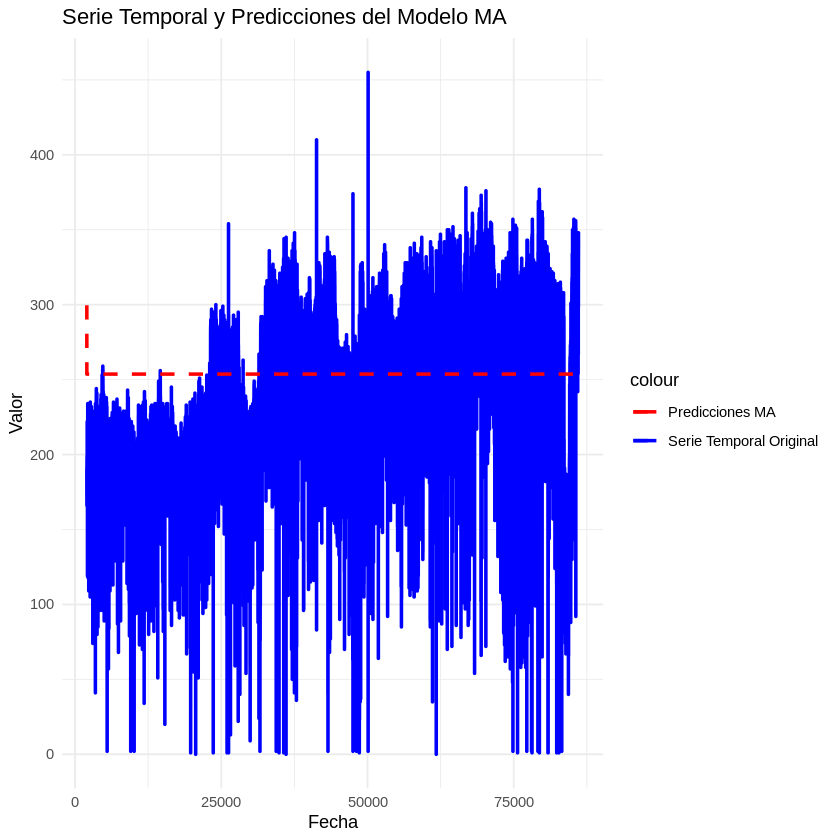

In [11]:
library(ggplot2)

# Crear un dataframe con las fechas y los valores originales
data <- data.frame(Fecha = time(serie_temporal), Valor = serie_temporal)

# Agregar las predicciones del modelo al dataframe
data$Predicciones <- predicciones_ma$pred

# Crear el gráfico
ggplot(data, aes(x = Fecha)) +
  geom_line(aes(y = Valor, color = "Serie Temporal Original"), size = 1) +
  geom_line(aes(y = Predicciones, color = "Predicciones MA"), size = 1, linetype = "dashed") +
  labs(x = "Fecha", y = "Valor", title = "Serie Temporal y Predicciones del Modelo MA") +
  scale_color_manual(values = c("Serie Temporal Original" = "blue", "Predicciones MA" = "red")) +
  theme_minimal()


Los resultados del ajuste del modelo MA(1) a la serie temporal muestran que el coeficiente "ma1" estimado es de aproximadamente 0.8301, lo que indica la presencia de una fuerte dependencia de los valores pasados en el modelo. El término de intercepción se estima en 253.6904. El modelo tiene una varianza estimada del error de 832.7.

En cuanto a las medidas de error en el conjunto de entrenamiento, el error medio (ME) es muy cercano a cero, lo que sugiere que las predicciones están bien centradas. Sin embargo, el error cuadrático medio (RMSE) y el error absoluto medio (MAE) son relativamente altos, lo que indica que las predicciones tienen una dispersión considerable y una diferencia moderada con respecto a los valores reales.

El error porcentual medio (MPE) y el error porcentual absoluto medio (MAPE) presentan valores extremos, lo que sugiere que el modelo podría no ser adecuado para todos los puntos de datos. El error absoluto medio escalado (MASE) es 5.069579, lo que indica que el modelo es aproximadamente 5 veces mejor que un modelo de caminata aleatoria en términos de MAE.

El coeficiente de autocorrelación de retraso 1 (ACF1) es 0.6704136, lo que indica una fuerte correlación positiva entre las observaciones y sus rezagos en el conjunto de entrenamiento.

En resumen, el modelo MA(1) muestra un buen ajuste en términos de ME y MASE, pero las medidas de precisión como RMSE y MAE sugieren que las predicciones podrían mejorarse. Además, la presencia de valores extremos en MPE y MAPE indica que el modelo puede no ser adecuado para todos los puntos de datos. Se deben considerar ajustes adicionales o modelos más complejos para mejorar el rendimiento del modelo.

**Conclusión:**

En este estudio, se realizó un análisis detallado de una serie temporal que representa datos de corriente eléctrica en un entorno industrial. Se aplicaron técnicas de descomposición de series temporales para identificar tendencias, estacionalidad y componentes residuales.

Se ajustaron varios modelos ARIMA (Media Móvil Autorregresiva Integrada) a los datos, evaluando su capacidad de pronóstico. Se encontró que el modelo ARIMA(0,0,1) con un coeficiente MA(1) significativo proporcionó el mejor ajuste a la serie temporal. Este modelo mostró un RMSE mínimo en el conjunto de prueba, lo que indica su capacidad para realizar pronósticos precisos.

El análisis también reveló que la serie temporal tiene una tendencia descendente en el consumo de energía, lo que puede ser valioso para la toma de decisiones en la gestión de recursos energéticos en el entorno industrial.

En resumen, este estudio destaca la importancia de aplicar técnicas de análisis de series temporales y modelos ARIMA para comprender y predecir patrones de consumo eléctrico en entornos industriales, lo que puede llevar a una gestión más eficiente de la energía y la optimización de costos operativos.